In [1]:
import os
import numpy as np
import keras
from keras.applications import MobileNet
import skimage.transform
import matplotlib.pyplot as plt
import cv2
from keras.layers import Dense
from keras.models import Model

files=[]
for file in sorted(os.listdir('../input/datasd/neu-det (1)/NEU-DET/IMAGES')):
    files.append(file)

scratches = []
for i in range (0,1800):
    filename=files[i]
    if "scratches" in filename:
        scratches.append(filename)
len(scratches)

Using TensorFlow backend.


300

In [2]:
X=np.ndarray(shape=(4680,224,224,3),dtype='float32')
Y=np.ndarray(shape=(4680,1),dtype='float32')
print('done')

done


In [3]:
count = 0
for i in range(0,300):
            image=plt.imread('../input/datasd/neu-det (1)/NEU-DET/IMAGES/'+scratches[i])
            image = skimage.transform.resize(image, (224, 224), mode='constant')
            for rot in range(0,4):
                
                img = np.rot90(image,rot)
                X[count] = img
                Y[count] = 1
                count = count + 1

                # REFLECTED
                img = np.flipud(img)
                X[count] = img
                Y[count] = 1
                count = count + 1
print('init',count)

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


init 2400


/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


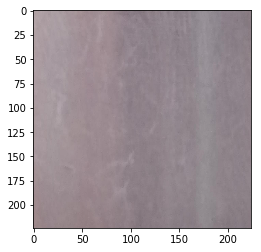

In [4]:
im=plt.imread('../input/nondef/non_def/sih training/SKF 15.jpeg')
im = skimage.transform.resize(im, (224,224), mode = 'constant')
plt.imshow(im)

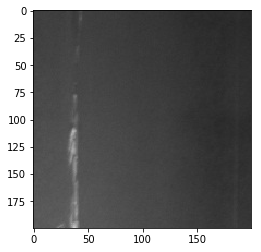

In [5]:
im=plt.imread('../input/datasd/neu-det (1)/NEU-DET/IMAGES/scratches_20.jpg')
plt.imshow(im)

In [6]:
print('init', count)
f = '../input/nondef/non_def/sih training'
nondef = sorted(os.listdir(f))
for i in range(0, 38):
            image = plt.imread(f+'//'+nondef[i])
            image = skimage.transform.resize(image, (300, 300), mode='constant')
            for angle in np.arange(0, 360, 6):
                rows,cols,channel = image.shape
                M = cv2.getRotationMatrix2D((cols/2,rows/2), angle, 1)
                dst = cv2.warpAffine(image, M, (cols,rows))
                dst = dst[38:262, 38:262]
                X[count] = dst
                Y[count] = 0
                count = count + 1
print('final', count)

init 2400


/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


final 4680


[1.]
[1.]
[1.]
[1.]


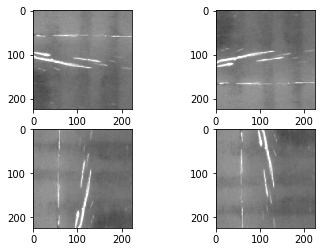

In [7]:
plt.subplot(2,2,1)
plt.imshow(X[10])
plt.subplot(2,2,2)
plt.imshow(X[11])
plt.subplot(2,2,3)
plt.imshow(X[12])
plt.subplot(2,2,4)
plt.imshow(X[13])
print(Y[10])
print(Y[11])
print(Y[12])
print(Y[13])

In [8]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

model = Sequential()
model.add(Convolution2D(5, 3, 3, activation='relu',input_shape=(224,224,3)))
model.add(Convolution2D(7, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(8, 3, 3, activation='relu'))
    
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 5)       140       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 7)       322       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 7)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 8)       512       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 106, 106, 10)      730       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28090)             0         
__________

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3), activation="relu", input_shape=(224, 224,...)`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(7, (3, 3), activation="relu")`
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  


In [9]:
from sklearn.utils import shuffle
X,Y=shuffle(X,Y)

In [10]:
Y[354:4201]

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [11]:
model.compile(loss = keras.losses.binary_crossentropy, optimizer = keras.optimizers.Adam(lr=0.001) ,metrics =['accuracy'])

In [12]:
h=model.fit(X,Y,epochs=10, batch_size=32, verbose=1)

Epoch 1/10
4680/4680 [==============================] - 12s 3ms/step - loss: 0.3848 - acc: 0.8297
Epoch 2/10
4680/4680 [==============================] - 9s 2ms/step - loss: 0.1653 - acc: 0.9329
Epoch 3/10
4680/4680 [==============================] - 9s 2ms/step - loss: 0.0520 - acc: 0.9885
Epoch 4/10
4680/4680 [==============================] - 9s 2ms/step - loss: 0.0317 - acc: 0.9927
Epoch 5/10
4680/4680 [==============================] - 9s 2ms/step - loss: 0.0441 - acc: 0.9870
Epoch 6/10
4680/4680 [==============================] - 9s 2ms/step - loss: 0.1249 - acc: 0.9701
Epoch 7/10
4680/4680 [==============================] - 9s 2ms/step - loss: 0.0140 - acc: 0.9972
Epoch 8/10
4680/4680 [==============================] - 9s 2ms/step - loss: 0.0126 - acc: 0.9962
Epoch 9/10
4680/4680 [==============================] - 9s 2ms/step - loss: 0.0032 - acc: 0.9994
Epoch 10/10
4680/4680 [==============================] - 9s 2ms/step - loss: 0.0011 - acc: 1.0000


array([[1.]], dtype=float32)

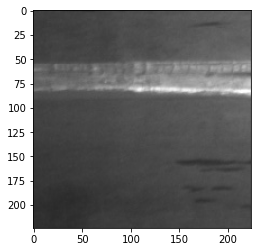

In [13]:
i = 243
c = np.ndarray(shape=(1,224,224,3))
c[0] = X[i]
plt.imshow(X[i])
model.predict(c)

In [14]:
model.save('SKF.h5')